In [1]:
import glob
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd
from skimage.filters import sobel, roberts, scharr, prewitt
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline
from skimage.io import imread

## Feature extraction: Edge Detection

*Edge detection* is an image processing technique for finding the boundaries of objects within images. It mainly works by detecting discontinuities in brightness. One of the most popular and widely used algorithm is Canny edge detector.

*Canny edge detector* is an edge detection operator that uses multi-stage algorithm to detect a wide range of edges in images.

Edge Detection general process:
1. Filtering out noise using Gaussian blur algorithm.
2. Finding the strength and direction of edges using Sobel Filters.
3. Isolating the strongest edges and thin them to one-pixel wide lines by applying non-maximum suppression.
4. Using hysteresis to isolate the best edges.

Canny edge detection algorithm process:
1. Noise reduction;
2. Gradient calculation;
3. Non-maximum suppression;
4. Double threshold;
5. Edge Tracking by Hysteresis.


# Edge Filter Information/Readings

#### __First Order Derivative__
 - Sobel: (3x3, smooth, + difference)

*Kernals for computing gradients*

 - Roberts: (2x2)
 - Prewitt: (3x3)
 - Scharr: Identifies and highlights gradient edges/features (readings say performance is similar to the Sobel filter)

#### __Second Order Derivative/Advanced Edge Detectors__
 - Canny

*Gaussian Kernals*

 - LOG (Laplacian of Gaussian Kernel): a very useful kernel for edge detection in images and DOG (Difference of Gaussian) kernel

#### Common	issues:	
 - Sensitive	to	image	noise	
 - Cannot	deal	with	the	scale	change	of	the	image		


#### Canny Edge Dectector Goal:	
1. Low	error	rate:	all	edges	should	be	found	and	there	
should	be	no	false	response	
2. Edge	points	should	be	well	localized:	the	edges	located	
must	be	as	close	as	possible	to	the	true	edges	
3. Single	edge	point	response:	the	detector	should	return	
only	one	point	for	each	true	edge	point

# Method 1: 
### Direct import using npz file

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
npz_car_final_filepath = '/content/drive/MyDrive/Colab Notebooks/car_final_data.npz'
np_array_final = np.load(npz_car_final_filepath, allow_pickle=True)
df_final = pd.DataFrame.from_dict({item: np_array_final[item] for item in np_array_final.files}, orient='index')

In [4]:
df_final = df_final.transpose()
df = df_final[(df_final.index % 5 == 0 )]

In [5]:
df.keys()

Index(['images', 'labels'], dtype='object')

In [6]:
image = df['images']

In [7]:
image.head()

0     [[[91, 69, 27], [88, 66, 24], [84, 62, 21], [8...
5     [[[0, 178, 249], [0, 178, 249], [1, 179, 250],...
10    [[[249, 254, 253], [249, 254, 253], [249, 254,...
15    [[[214, 196, 189], [215, 197, 190], [215, 197,...
20    [[[174, 167, 170], [174, 167, 170], [174, 168,...
Name: images, dtype: object

In [134]:
test_image_min  = df['images'][1000]
test_image_mod  = df['images'][3000]
test_image_sev  = df['images'][5000]

In [135]:
test_img_gray_min = cv2.cvtColor(test_image_min, cv2.COLOR_BGR2GRAY) 
test_img_blur_min = cv2.GaussianBlur(test_img_gray_min, (5, 5), 0)

test_img_gray_mod = cv2.cvtColor(test_image_mod, cv2.COLOR_BGR2GRAY) 
test_img_blur_mod = cv2.GaussianBlur(test_img_gray_mod, (5, 5), 0)

test_img_gray_sev = cv2.cvtColor(test_image_sev, cv2.COLOR_BGR2GRAY) 
test_img_blur_sev = cv2.GaussianBlur(test_img_gray_sev, (5, 5), 0)

# Testing Edge Filters

In [136]:
#SOBEL
# edge_sobel_min = sobel(test_img_gray_min)
# edge_sobel_mod = sobel(test_img_gray_mod)
# edge_sobel_sev = sobel(test_img_gray_sev)
edge_sobel_min = sobel(test_img_blur_min)
edge_sobel_mod = sobel(test_img_blur_mod)
edge_sobel_sev = sobel(test_img_blur_sev)

#ROBERTS
# edge_rob_min = roberts(test_img_gray_min)
# edge_rob_mod = roberts(test_img_gray_mod)
# edge_rob_sev = roberts(test_img_gray_sev)
edge_rob_min = roberts(test_img_blur_min)
edge_rob_mod = roberts(test_img_blur_mod)
edge_rob_sev = roberts(test_img_blur_sev)

#PREWITT
# edge_prewitt_min = prewitt(test_img_gray_min)
# edge_prewitt_mod = prewitt(test_img_gray_min)
# edge_prewitt_sev = prewitt(test_img_gray_sev)
edge_prewitt_min = prewitt(test_img_blur_min)
edge_prewitt_mod = prewitt(test_img_blur_mod)
edge_prewitt_sev = prewitt(test_img_blur_sev)

#SCHARR
# edge_sch_min = scharr(test_img_gray_min)
# edge_sch_mod = scharr(test_img_gray_mod)
# edge_sch_sev = scharr(test_img_gray_sev)
edge_sch_min = scharr(test_img_blur_min)
edge_sch_mod = scharr(test_img_blur_mod)
edge_sch_sev = scharr(test_img_blur_sev)


# TODO: ADD GAUSSIAN FILTERS
# LOG, a very useful kernel for edge detection in images and DOG kernel
# LOG filter (Laplacian of Gaussian Kernel)
# DOG filter (Difference of Gaussian)

# Simple Canny Edge Detection


In [137]:
edge_canny_min = cv2.Canny(test_img_blur_min, threshold1=30, threshold2=200)
edge_canny_mod = cv2.Canny(test_img_blur_mod, threshold1=30, threshold2=200) 
edge_canny_sev = cv2.Canny(test_img_blur_sev, threshold1=30, threshold2=200) 

# Comparing Original vs Filtered Image

In [138]:
def image_compare(image, filtered_image, filter_type):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

  ax1.imshow(image, cmap=plt.cm.gray) 
  ax1.set_title('Original Image', fontsize=24) 

  image_rescaled = exposure.rescale_intensity(filtered_image, in_range=(0, 10)) 

  ax2.imshow(image_rescaled, cmap=plt.cm.gray) 
  filter_list = {'sobel': 'Sobel Filter Edge Detection', 'roberts': 'Roberts Filter Edge Detection', 'scharr': 'Scharr Filter Edge Detection', 'prewitt': 'Prewitt Filter Edge Detection', 'canny': 'Canny Filter Edge Detection'}

  for key in filter_list:
    if key == filter_type:
      ax2.set_title(filter_list[filter_type], fontsize=24)

  plt.tight_layout()
  plt.show()

#### Minor Car Damage

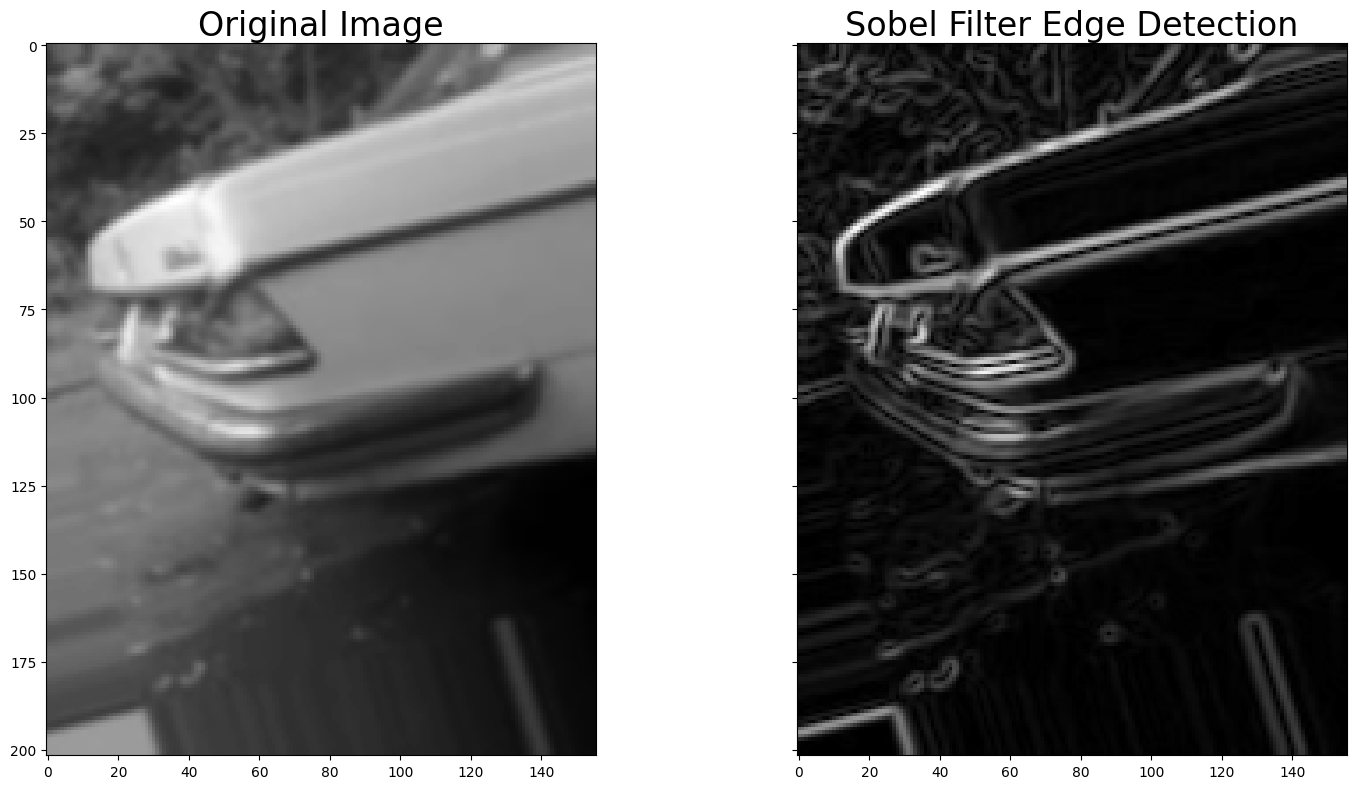

In [139]:
image_compare(test_img_blur_min, edge_sobel_min, 'sobel' )

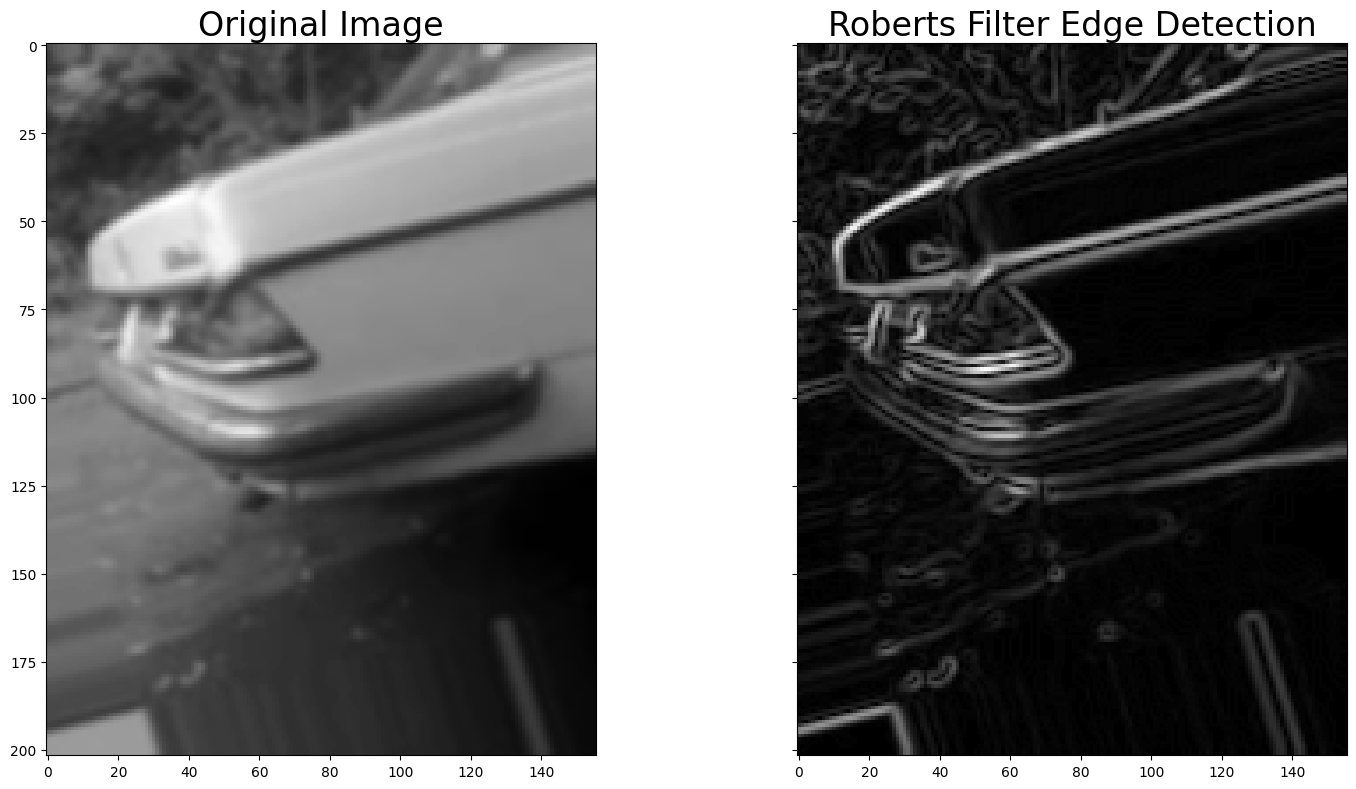

In [140]:
image_compare(test_img_blur_min, edge_rob_min, 'roberts' )

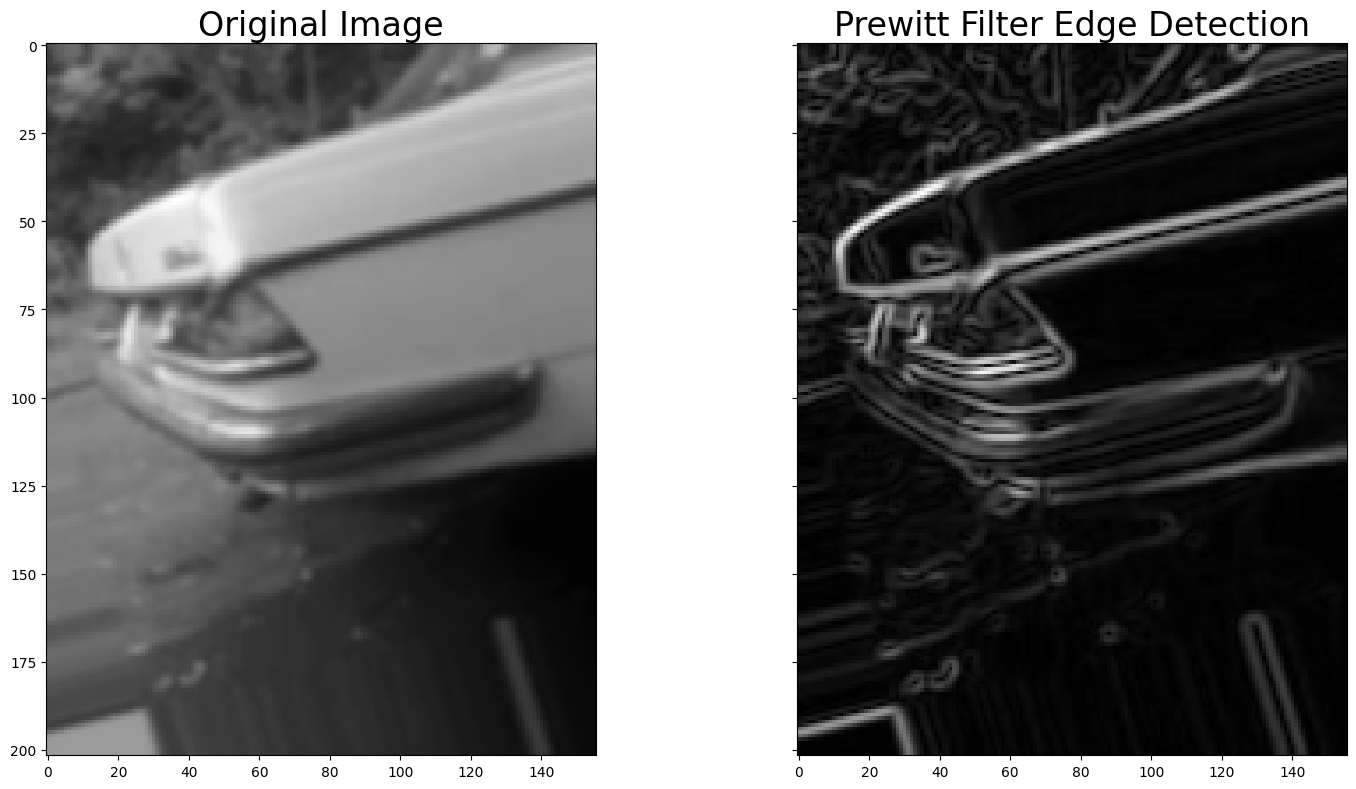

In [141]:
image_compare(test_img_blur_min, edge_prewitt_min, 'prewitt' )

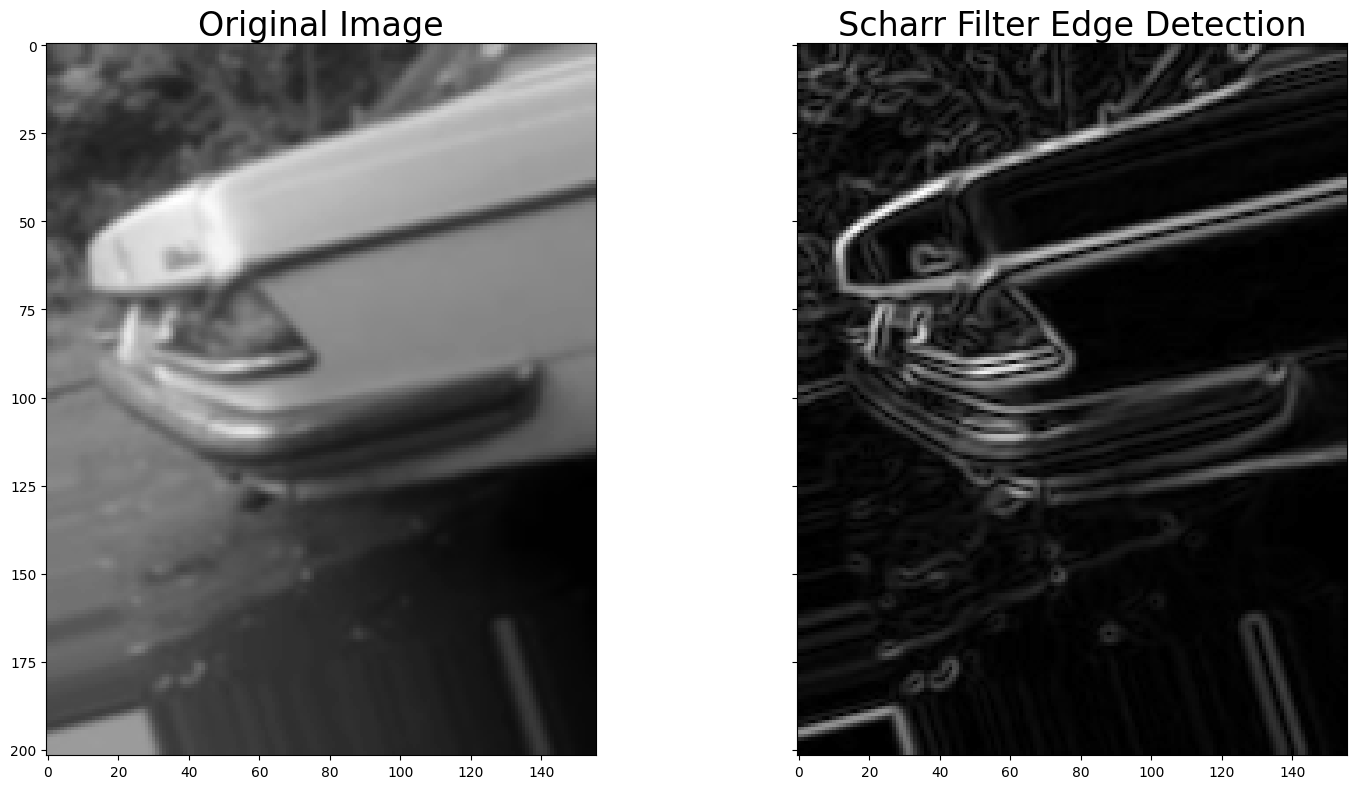

In [142]:
image_compare(test_img_blur_min, edge_sch_min, 'scharr' )

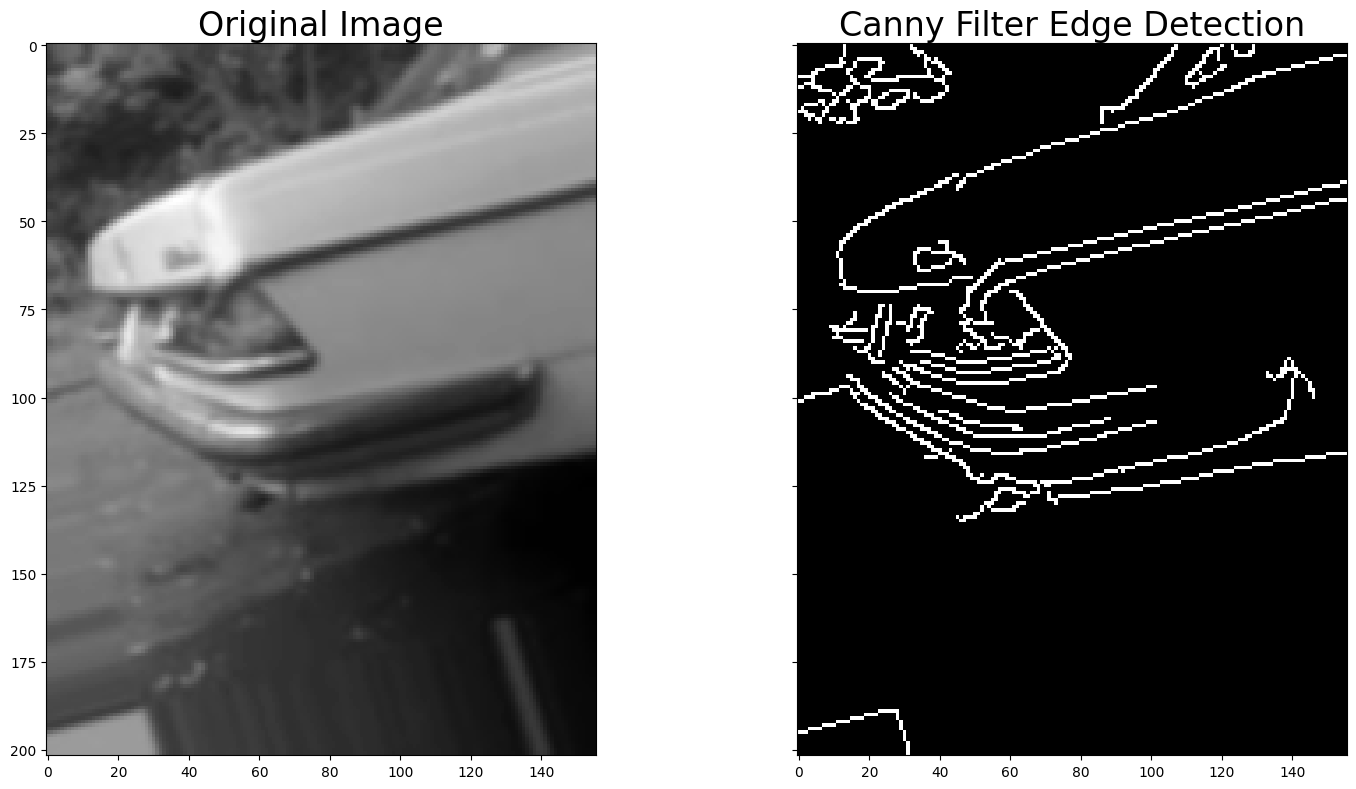

In [143]:
image_compare(test_img_blur_min, edge_canny_min, 'canny' )

#### Moderate Car Damage

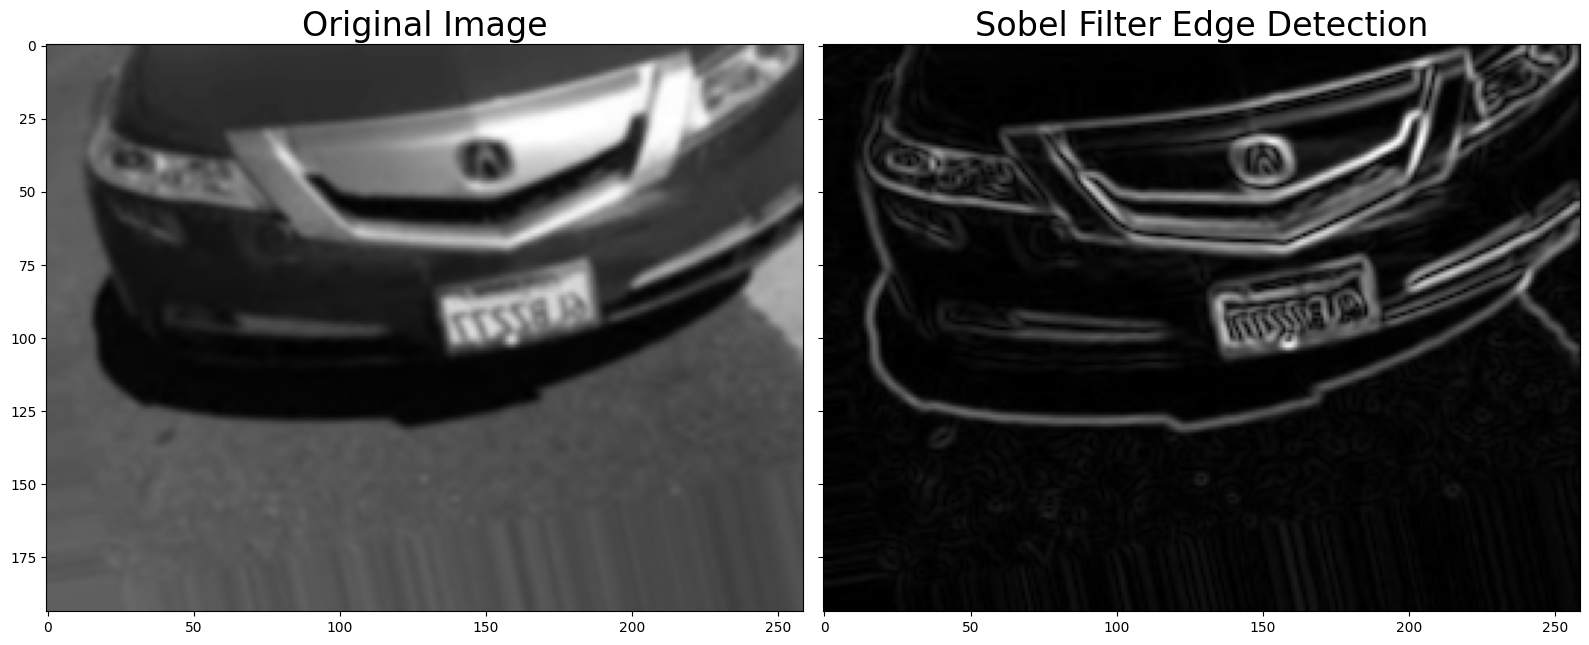

In [144]:
image_compare(test_img_blur_mod, edge_sobel_mod, 'sobel' )

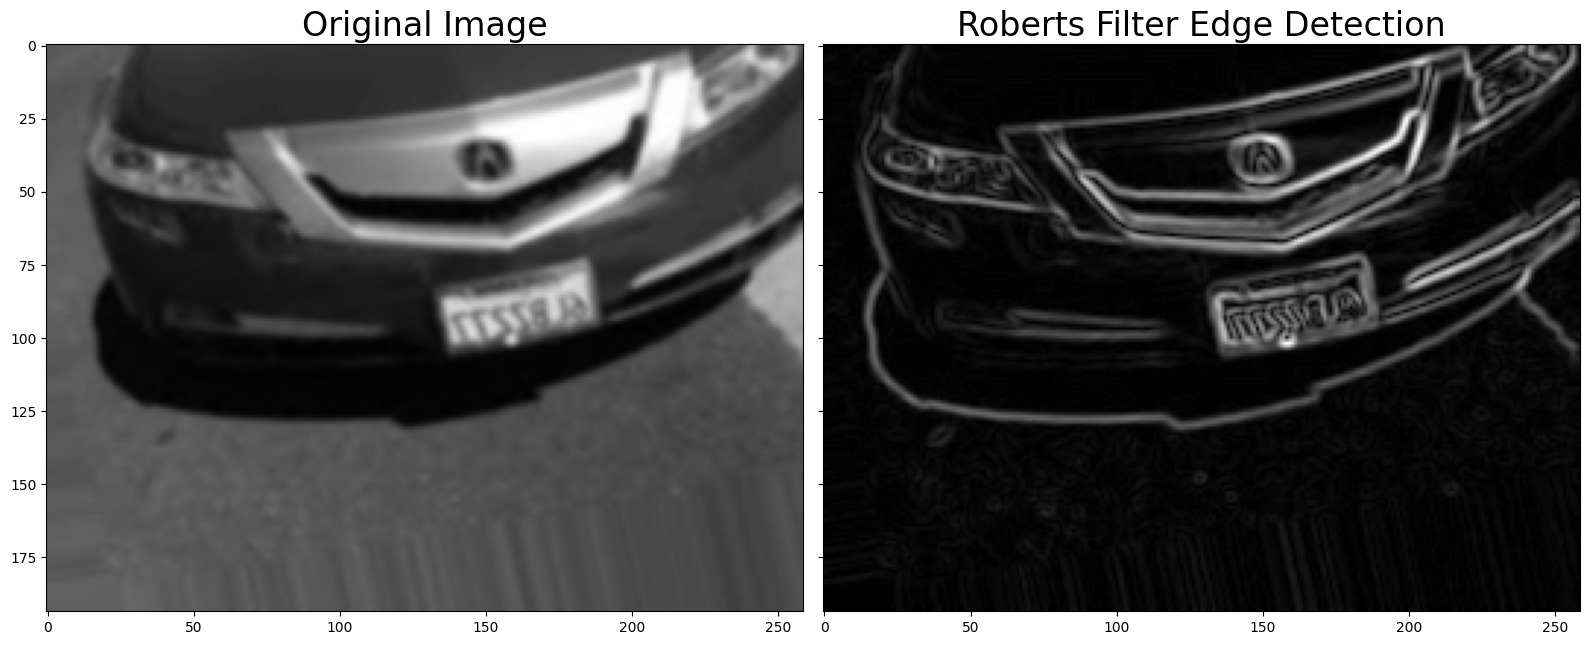

In [145]:
image_compare(test_img_blur_mod, edge_rob_mod, 'roberts' )

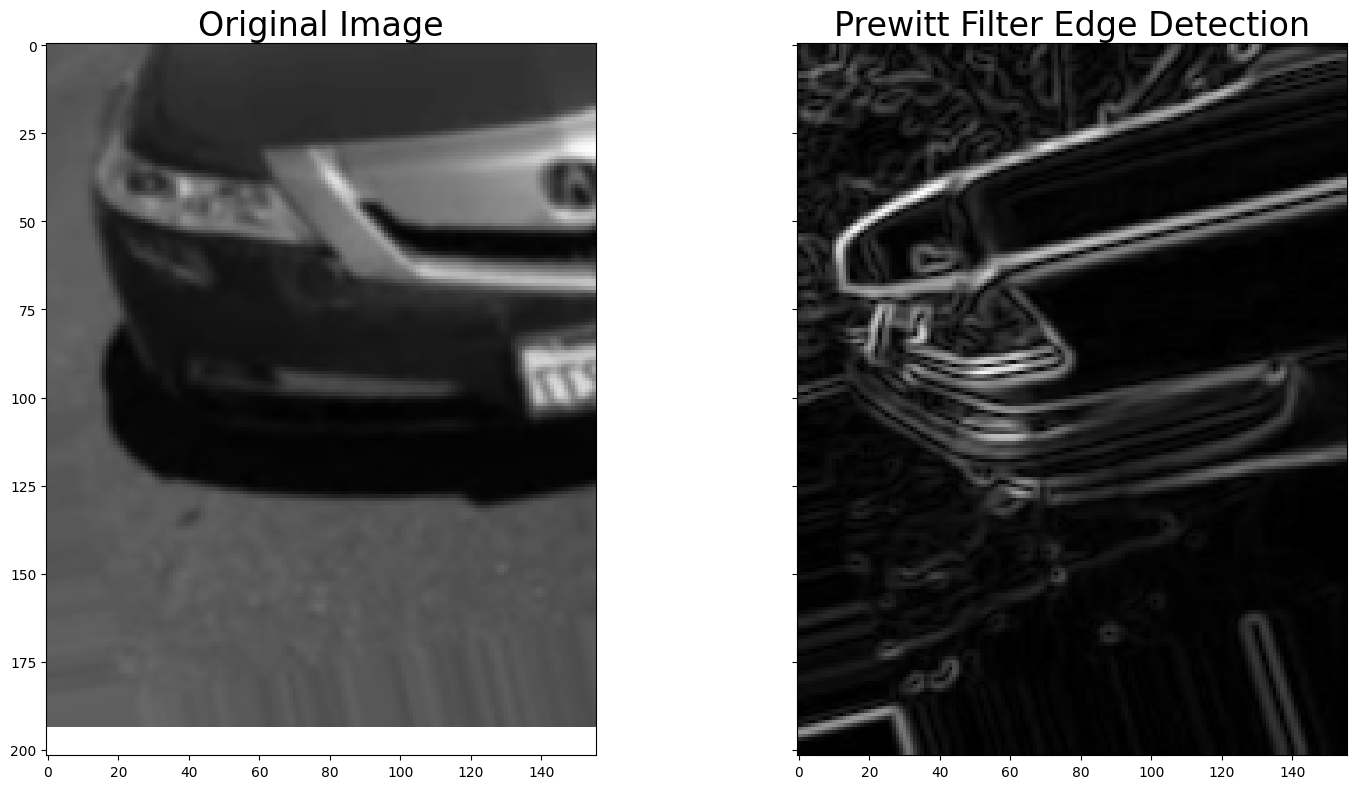

In [146]:
image_compare(test_img_blur_mod, edge_prewitt_mod, 'prewitt' )

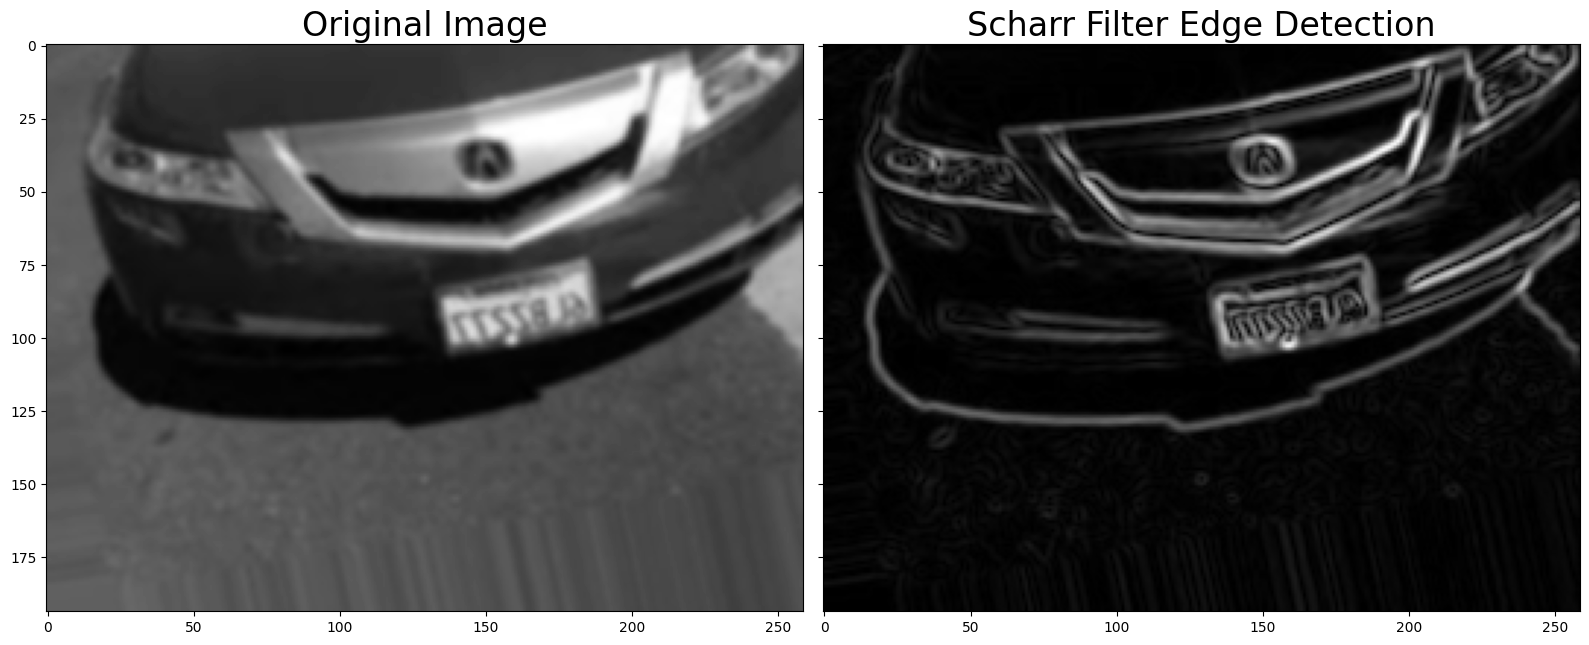

In [147]:
image_compare(test_img_blur_mod, edge_sch_mod, 'scharr' )

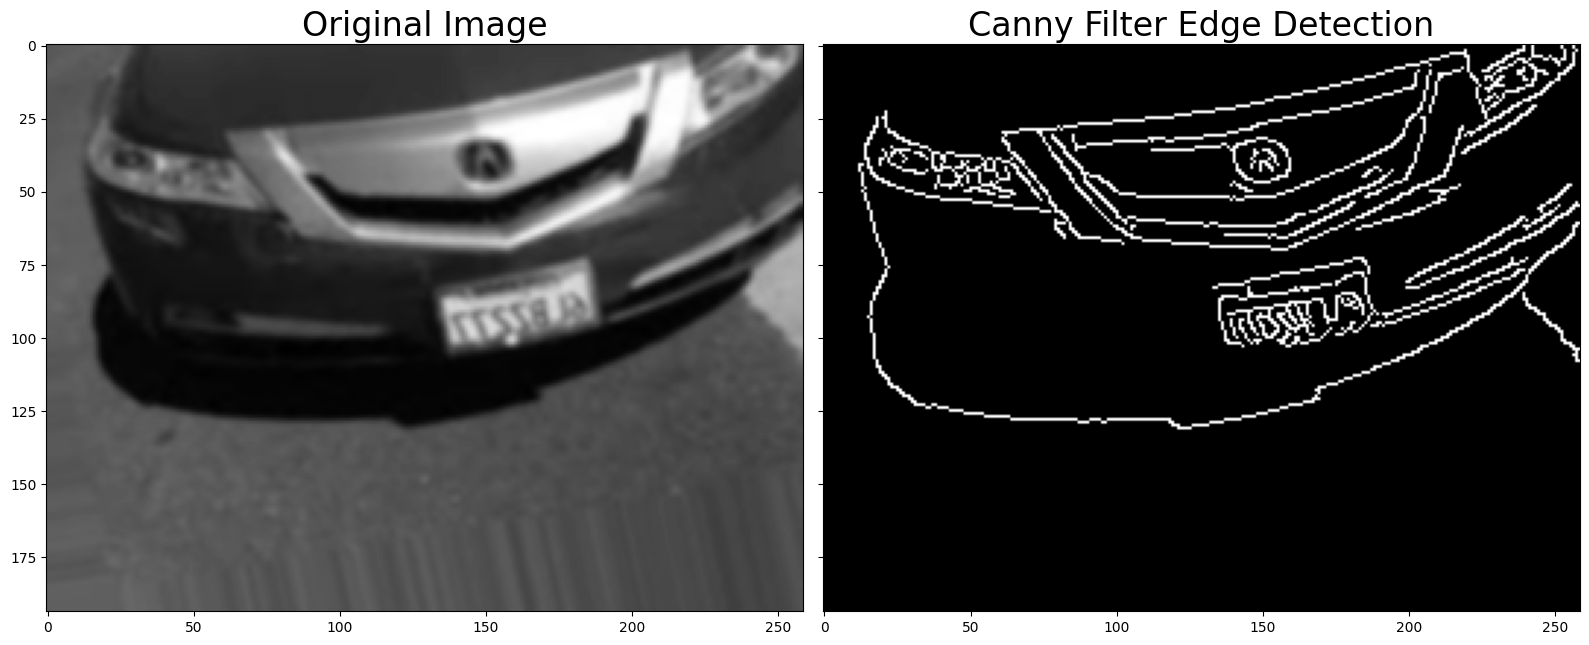

In [148]:
image_compare(test_img_blur_mod, edge_canny_mod, 'canny' )

#### Severe Car Damage

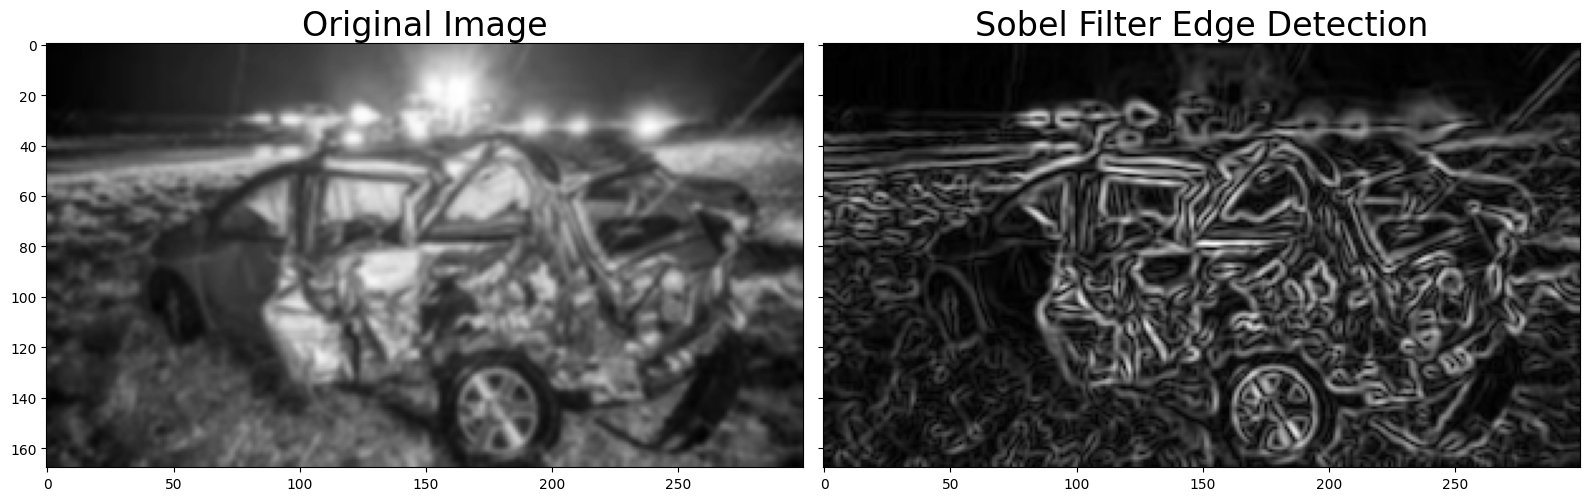

In [149]:
image_compare(test_img_blur_sev, edge_sobel_sev, 'sobel' )

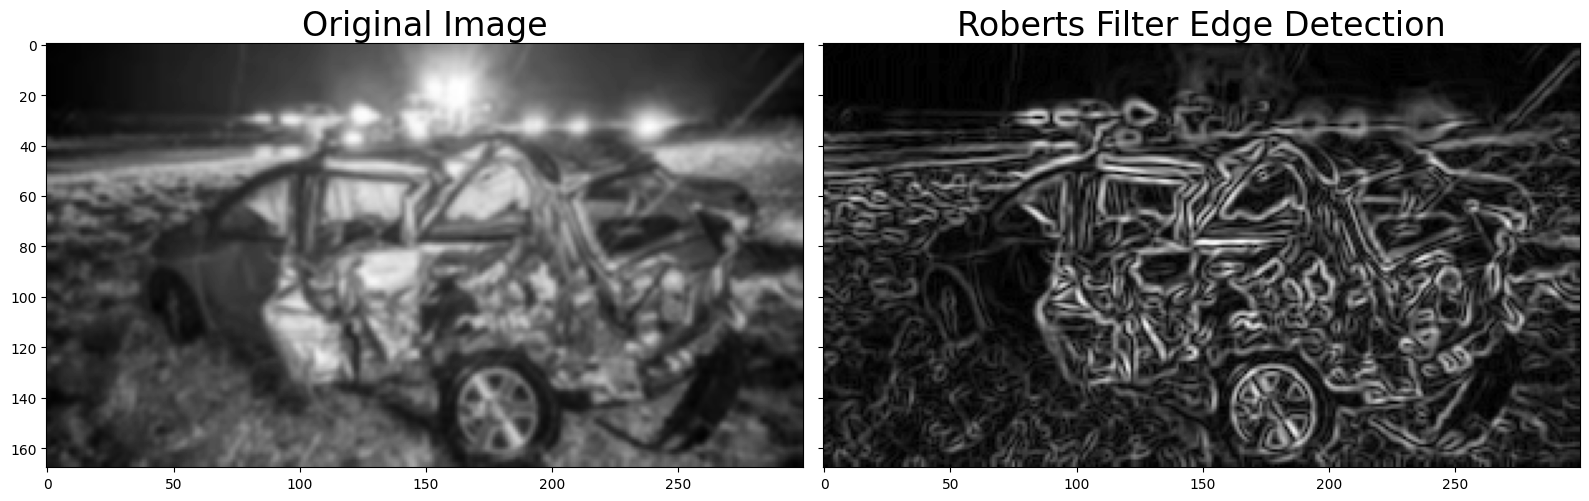

In [150]:
image_compare(test_img_blur_sev, edge_rob_sev, 'roberts' )

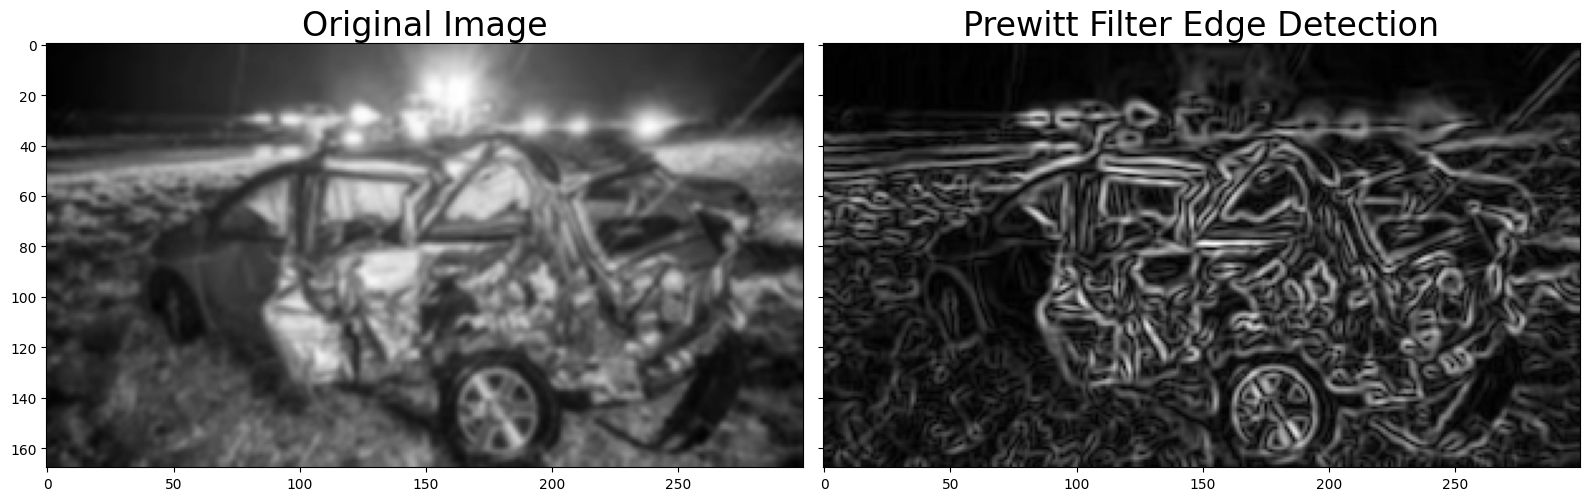

In [151]:
image_compare(test_img_blur_sev, edge_prewitt_sev, 'prewitt' )

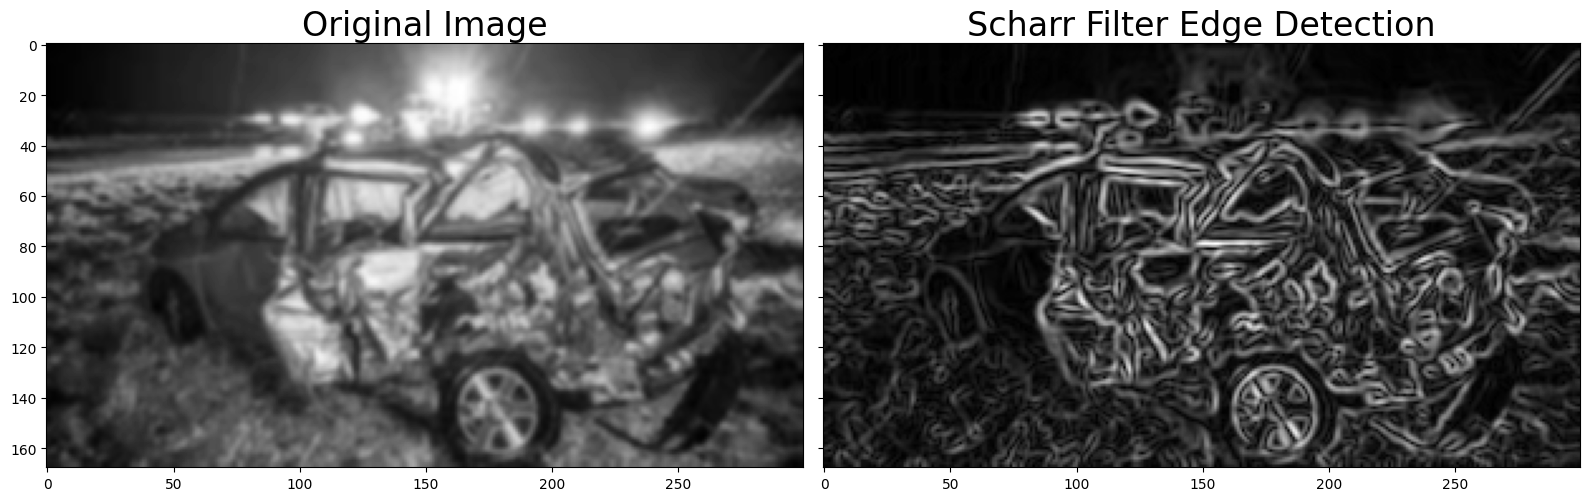

In [152]:
image_compare(test_img_blur_sev, edge_sch_sev, 'scharr' )

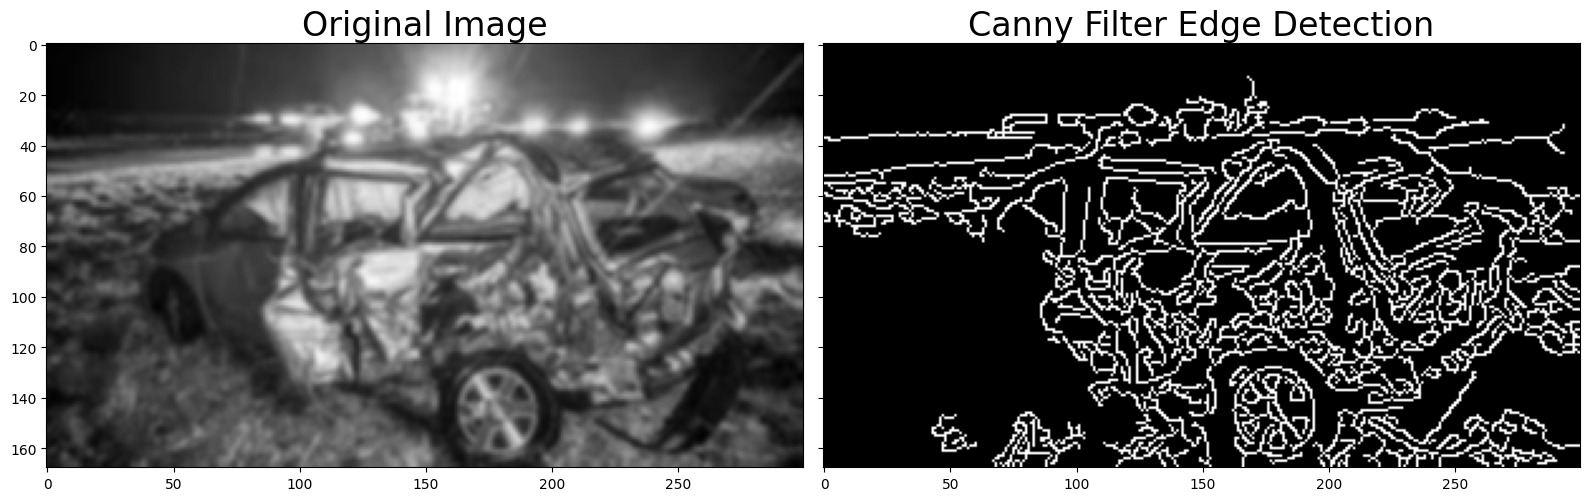

In [153]:
image_compare(test_img_blur_sev, edge_canny_sev, 'canny' )

#[Canny Edge Detector Step-by-Step Guide](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123) 


#### Testing to see if this method works the same/better than the canny filter above

In [154]:
from scipy import ndimage

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)
    

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    #pi_4 = np.pi / 4
    #pi_2 = np.pi / 2
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                #theta = D[i,j] #* 180 / np.pi #angle in degrees
                #theta_mod = theta % np.pi
                q = 255
                r = 255
                #alpha = None
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                """
                if (0 <= theta_mod < pi_4):
                    alpha = np.abs(np.tan(theta_mod))
                    q = (alpha * img[i + 1, j + 1]) + ((1 - alpha) * img[i, j + 1])
                    r = (alpha * img[i - 1, j - 1]) + ((1 - alpha) * img[i, j - 1]) 
                    
                elif (pi_4 <= theta_mod < pi_2):
                    alpha = np.abs(1./np.tan(theta_mod))
                    q = (alpha * img[i + 1, j + 1]) + ((1 - alpha) * img[i + 1, j])
                    r = (alpha * img[i - 1, j - 1]) + ((1 - alpha) * img[i - 1, j])
                    
                elif (pi_2 <= theta_mod < (3*pi_4)):
                    alpha = np.abs(1./np.tan(theta_mod))
                    q = (alpha * img[i + 1, j - 1]) + ((1 - alpha) * img[i + 1, j])
                    r = (alpha * img[i - 1, j + 1]) + ((1 - alpha) * img[i - 1, j])
                
                elif ((3*pi_4) <= theta_mod < np.pi):
                    alpha = np.abs(np.tan(theta_mod))
                    q = (alpha * img[i + 1, j - 1]) + ((1 - alpha) * img[i, j - 1])
                    r = (alpha * img[i - 1, j + 1]) + ((1 - alpha) * img[i, j + 1])
                """
                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0
                

            except IndexError as e:
                pass
    
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

def hysteresis(img, weak, strong=255):
    
    M, N = img.shape  
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    
    return img

In [160]:
from  skimage.feature import canny
from scipy.ndimage import gaussian_filter
from scipy.ndimage import convolve

from scipy import misc
import numpy as np

def visualize(imgs, format=None):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(4, 2, plt_idx)    
        plt.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=255)
    plt.show()

def Canny_detector(img):
    """ Your implementation instead of skimage """
    
    img_filtered = convolve(img, gaussian_kernel(5, sigma=1.4))
    grad, theta = sobel_filters(img_filtered)
    img_nms = non_max_suppression(grad, theta)
    img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.07, highThresholdRatio=0.19)
    img_final = hysteresis(img_thresh, weak, strong=strong)
   
    return img_final

In [161]:
plates = [test_image_min, test_image_mod, test_image_sev]

canny_imgs = []
for i, img in enumerate(plates):
    print("Processing image %i" % (i+1))
    canny_img = Canny_detector(img)
    canny_imgs.append(canny_img)
    
visualize(canny_imgs, 'gray')

Processing image 1


RuntimeError: ignored

# Running ML models on entire numpy data